1) Фреймворк - Pytorch (torchvision.models.detection)

2)Запуск детектора на случайных картинках


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
from PIL import Image
import cv2
from pathlib import Path
from xml.etree import ElementTree
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [2]:
model = tv.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

--2020-06-24 19:31:04--  https://cs11.pikabu.ru/post_img/2020/06/14/4/1592113189188058919.webp
Resolving cs11.pikabu.ru (cs11.pikabu.ru)... 103.254.154.95
Connecting to cs11.pikabu.ru (cs11.pikabu.ru)|103.254.154.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62160 (61K) [image/webp]
Saving to: ‘1592113189188058919.webp.1’

1592113189188058919 100%[===================>]  60.70K  --.-KB/s    in 0.01s   

2020-06-24 19:31:05 (4.25 MB/s) - ‘1592113189188058919.webp.1’ saved [62160/62160]



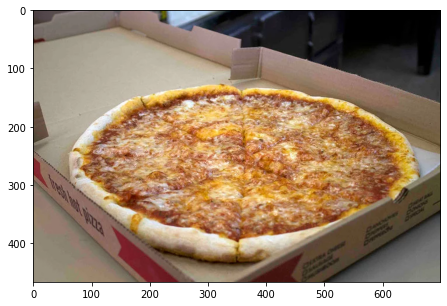

In [4]:
!wget https://cs11.pikabu.ru/post_img/2020/06/14/4/1592113189188058919.webp
pilimg = Image.open('/content/1592113189188058919.webp')
plt.figure(figsize=(10,5))
plt.imshow(pilimg);

In [5]:
model.eval()
img = tv.transforms.ToTensor()(pilimg).unsqueeze(0)
predict = model(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [6]:
def plot_preds(pilimg, predict):
    numimg = np.array(pilimg)
    boxes = predict[0]['boxes'][predict[0]['scores']>0.9].detach().numpy()
    labels = predict[0]['labels'][predict[0]['scores']>0.9].detach().numpy()
    # Переведем метки в названия
    COCO = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
    # Отрисовка
    counter=0
    for i in boxes:
        final = cv2.rectangle(numimg, (i[0],i[1]), (i[2],i[3]), color=(128, 0, 128), thickness=3)
        cv2.putText(numimg, str(COCO[labels[counter]]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (0,0,0), 2)
        counter+=1
    plt.figure(figsize=(10,5))
    return plt.imshow(final)

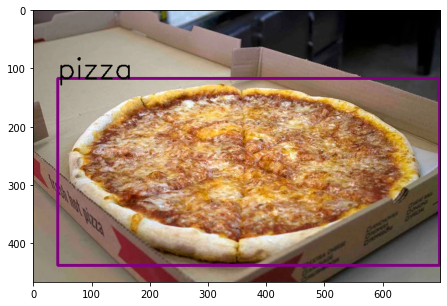

In [7]:
plot_preds(pilimg, predict)

В данном проекте попытаюсь выполнить оба сценария.
Датасет: https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection
Детекция фруктов

In [8]:
#Загрузим датасет
import gdown
gdown.download('https://drive.google.com/uc?id=1itp1MtwVuF5xFnJkbErNQuDwKjEdmPvM', '34662_46346_bundle_archive.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1itp1MtwVuF5xFnJkbErNQuDwKjEdmPvM
To: /content/34662_46346_bundle_archive.zip
29.7MB [00:00, 172MB/s]


'34662_46346_bundle_archive.zip'

In [9]:
#Разархивируем датасет с каггла
!unzip -q 34662_46346_bundle_archive.zip

replace test_zip/test/apple_77.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [10]:
#Кодируем классы
label_code = ['apple', 'orange', 'banana']
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [11]:
#Меняем количество классов для предсказания
num_class = 3
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

In [12]:
path = Path('/content')
_path = path /'train_zip'/'train'
img_lst = list(sorted(_path.glob("*.jpg")))
xml_lst = list(sorted(_path.glob("*.xml")))

In [13]:
class FrutDataset (torch.utils.data.Dataset):
    def __init__(self, path, mode):
        self.path = path 
        self.mode = mode
        path = Path(path)
        if mode == "train":
            _path = path /'train_zip'/'train'
            self.img_lst = list(sorted(_path.glob("*.jpg")))
            self.xml_lst = list(sorted(_path.glob("*.xml")))
        elif mode == "test":
            _path = path/'test_zip'/'test'
            self.img_lst = list(sorted(_path.glob("*.jpg")))
            self.xml_lst = list(sorted(_path.glob("*.xml")))
        else:
            raise ValueError('Incorrect mode')
    
    def __len__(self):
        return len(self.img_lst)

    def __getitem__(self, index):
        img = self.img_lst[index]
        label = self.xml_lst[index]
        pil = Image.open(img).convert('RGB')
        x = tv.transforms.ToTensor()(pil)

        tr = ElementTree.parse(label)
        root = tr.getroot()
        name = []
        coord = []
        labels_code = ['apple', 'orange', 'banana']
        for element in root.iter('object'):
            tempcoord = []
            for child in element:
                if child.tag == 'name':
                    name += [labels_code.index(child.text)]
                elif child.tag == 'bndbox':
                    for i in child:
                        tempcoord +=[int(i.text)]
                    coord +=[tempcoord]
        coord = torch.LongTensor(coord)
        name = torch.LongTensor(name)
        label = {'boxes':coord , 'labels': name}
        return (x, label)

In [14]:
#Создаем обучающий и валидационный сеты
train_set = FrutDataset(path = '/content', mode='train')
val_set = FrutDataset(path = '/content', mode='test')

In [15]:
def my_collate(batch):
    image = [i[0].to(device) for i in batch]
    target = [i[1] for i in batch]
    target = [{k: v.to(device) for k, v in t.items()} for t in target]
    return image, target

In [16]:
#Загрузчики
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
                                           shuffle=True, collate_fn=my_collate)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, 
                                         shuffle=False, collate_fn=my_collate)

In [17]:
def plot_rand_img(paths_img, list_of_dicts):
    '''
    Функция отрисовывает картинку из трейн датасета.
    '''
    idx = np.random.randint(0,241)
    img = Image.open(paths_img[idx]).convert('RGB')
    y = list_of_dicts[idx]
    x = np.array(img)
    boxes = y['boxes'].numpy()
    classes = y['labels'].numpy()
    label_code = ['apple', 'orange', 'banana']
    counter=0
    for i in boxes:
        final = cv2.rectangle(x, (i[0],i[1]), (i[2],i[3]), 
                              color=(128, 0, 128), thickness=2)
        cv2.putText(x, str(label_code[classes[counter]]), (i[0],i[1]), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (128,1,128), 2)
        counter+=1
    plt.figure(figsize=(15,5))
    return plt.imshow(final)

In [18]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), amsgrad=True)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=3, gamma=0.1)

In [19]:
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [20]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

fatal: destination path 'vision' already exists and is not an empty directory.
HEAD is now at be37608 version check against PyTorch's CUDA version


In [21]:
from engine import train_one_epoch

In [23]:
num_epochs = 10
for epoch in range(num_epochs):
    train_one_epoch(model, optim, train_loader, device, epoch, print_freq=60)
    lr_scheduler.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Epoch: [0]  [ 0/60]  eta: 0:00:45  lr: 0.000018  loss: 0.0988 (0.0988)  loss_classifier: 0.0491 (0.0491)  loss_box_reg: 0.0255 (0.0255)  loss_objectness: 0.0151 (0.0151)  loss_rpn_box_reg: 0.0091 (0.0091)  time: 0.7616  data: 0.0546  max mem: 8796


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored